# <center><div class="alert alert-info">ANOMALY DETECTION FOR 3-PHASE AC MOTOR</div>
## <center>Submitted By - Jitendra Girish Patil</div>

## Problem Statement

Data set contains real-time current readings of a 3-phase AC motor (3.2hp) 
motor current signature analysis and model-based VI analysis to be done to detect anomalies 

Detect anomaly and alert defects from an unstructured data pool received from current and voltage sensors of a 3-phase induction motor (Medium Voltage) at a rate of 10K - 15K instances per second. 

### <center><div class="alert alert-info">IMPORTING LIBRARIES</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### <center><div class="alert alert-info">IMPORTING THE DATA</div>

In [2]:
df1 = pd.read_csv('data112.txt', delimiter=',', header=None).T
# df2 = pd.read_csv('data0 (1).txt', delimiter=',', header=None).T
# df3 = pd.read_csv('data109.txt', delimiter=',', header=None).T
# df4 = pd.read_csv('data88.txt', delimiter=',', header=None).T
# df5 = pd.read_csv('data89.txt', delimiter=',', header=None).T
# df6 = pd.read_csv('data89.txt', delimiter=',', header=None).T

### In the data set file i have changed 2 values in 0 and 3rd index. The Value is 12000 to check anomaly detection.

### <center><div class="alert alert-info">DATA EXPLORATION</div>

In [3]:
from simple_colors import *

def details(data):
    print(green(f'Shape of the Data Set : \n', 'bold'))
    print(f'{data.shape}')                                                  # checking shape
    print('---------------------------------------------------')
    print()
    print(green(f'Information of the Data Set : \n', 'bold'))
    print(f'{data.info()}')                                                 # checking information
    print('---------------------------------------------------')
    print()
    print(green(f'Description of the Data Set : \n', 'bold'))
    print(f'{data.describe()}')                                             # checking description
    print('---------------------------------------------------')

In [4]:
details(df1)           # details of train data

Shape of the Data Set : 

(10001, 1)
---------------------------------------------------

Information of the Data Set : 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10001 entries, 0 to 10000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
dtypes: float64(1)
memory usage: 156.3 KB
None
---------------------------------------------------

Description of the Data Set : 

                   0
count   10000.000000
mean       26.980000
std      1200.857053
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max    120000.000000
---------------------------------------------------


### <center><div class="alert alert-info">DATA PREPROCESSING</div>

## Missing Value Treatment

In [5]:
# Checking the null values Count
df1.isnull().sum().value_counts()

1    1
dtype: int64

In [6]:
x = df1.dropna()          # As there is only 1 missing value in the data set of 100000, We can drop the row.
x

,0
0,120000.0
1,0.0
2,0.0
3,120.0
4,0.0
...,...
9995,0.0
9996,248.0
9997,0.0
9998,0.0


## Feature Scaling

- As the Values in row have wide range of variety, Standardisation is done as it makes the training faster and makes it easy for a model to learn and understand the problem.

In [9]:
numerics = ['int16','int32','int64']
scaler = StandardScaler()                             # stadardising the values
scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
scaled

,0
0,99.911158
1,-0.022468
2,-0.022468
3,0.077465
4,-0.022468
...,...
9995,-0.022468
9996,0.184061
9997,-0.022468
9998,-0.022468


### <center><div class="alert alert-success">MODEL BUILDING USING LOCAL OUTLIER FACTOR</div>

In [10]:
from sklearn.neighbors import LocalOutlierFactor

# Create the KNN anomaly detector
clf = LocalOutlierFactor(n_neighbors=2, contamination=0.1)

# Fit the detector to the data
clf.fit(scaled)

# Use the detector to predict which data points are anomalies
y_pred = clf.fit_predict(scaled)

# Print the predictions
print(y_pred)

[-1  1  1 ...  1  1  1]


In [11]:
# Gettin Unique Value for y_pred
# This is done because we are checking if there are anomaly in the data set or not. 
# If the value comes -1 it means anomaly is present

np.unique(y_pred)

array([-1,  1])

In [12]:
# Cross Checking with minimum value present in the predicted values
min(y_pred)

-1

### Visualisation of Data and Anomaly points using box plot

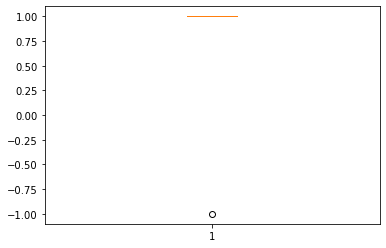

In [13]:
plt.boxplot(y_pred)
plt.show()

### <div class="alert alert-success">Interpretation<div>
### **We can see that the algorithm is successfully detecting the anomaly in the data when outliers has been added to it.**